In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np

plt.style.use('dark_background')

In [2]:
df = pd.read_csv("../../data/master.csv")
df.sort_values(['Developing','country', 'year'], inplace=True)
df.reset_index(drop=True, inplace=True)
df.head()

,ISO,country,year,yr_sch,yr_sch_pri,yr_sch_sec,yr_sch_ter,"Gross domestic product per capita, current prices",Unemployment rate,Population,...,obese_children_prevalence_SEX_BTSX_AGEGROUP_YEARS10-19,underweight_adults_prevalence_SEX_FMLE,underweight_adults_prevalence_SEX_BTSX,underweight_adults_prevalence_SEX_MLE,overweight_adults_prevalence_SEX_BTSX,overweight_adults_prevalence_SEX_MLE,overweight_adults_prevalence_SEX_FMLE,obese_adults_prevalence_SEX_BTSX,obese_adults_prevalence_SEX_MLE,obese_adults_prevalence_SEX_FMLE
0,AND,Andorra,2000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7.37391,3.41026,2.33471,1.33829,48.91428,55.52637,41.77706,14.57424,14.48056,14.67537
1,AND,Andorra,2001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7.62680,3.38228,2.30707,1.30840,49.39171,56.21318,42.04741,14.98061,15.06607,14.88860
2,AND,Andorra,2002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7.85746,3.40481,2.31059,1.29644,49.57156,56.60038,41.98778,15.26287,15.53899,14.96495
3,AND,Andorra,2003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,8.10634,3.41720,2.30555,1.27860,49.79273,57.03399,41.95425,15.55417,16.01800,15.05208
4,AND,Andorra,2004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,8.37555,3.41692,2.29094,1.25449,50.05269,57.51136,41.94971,15.85633,16.50580,15.15076


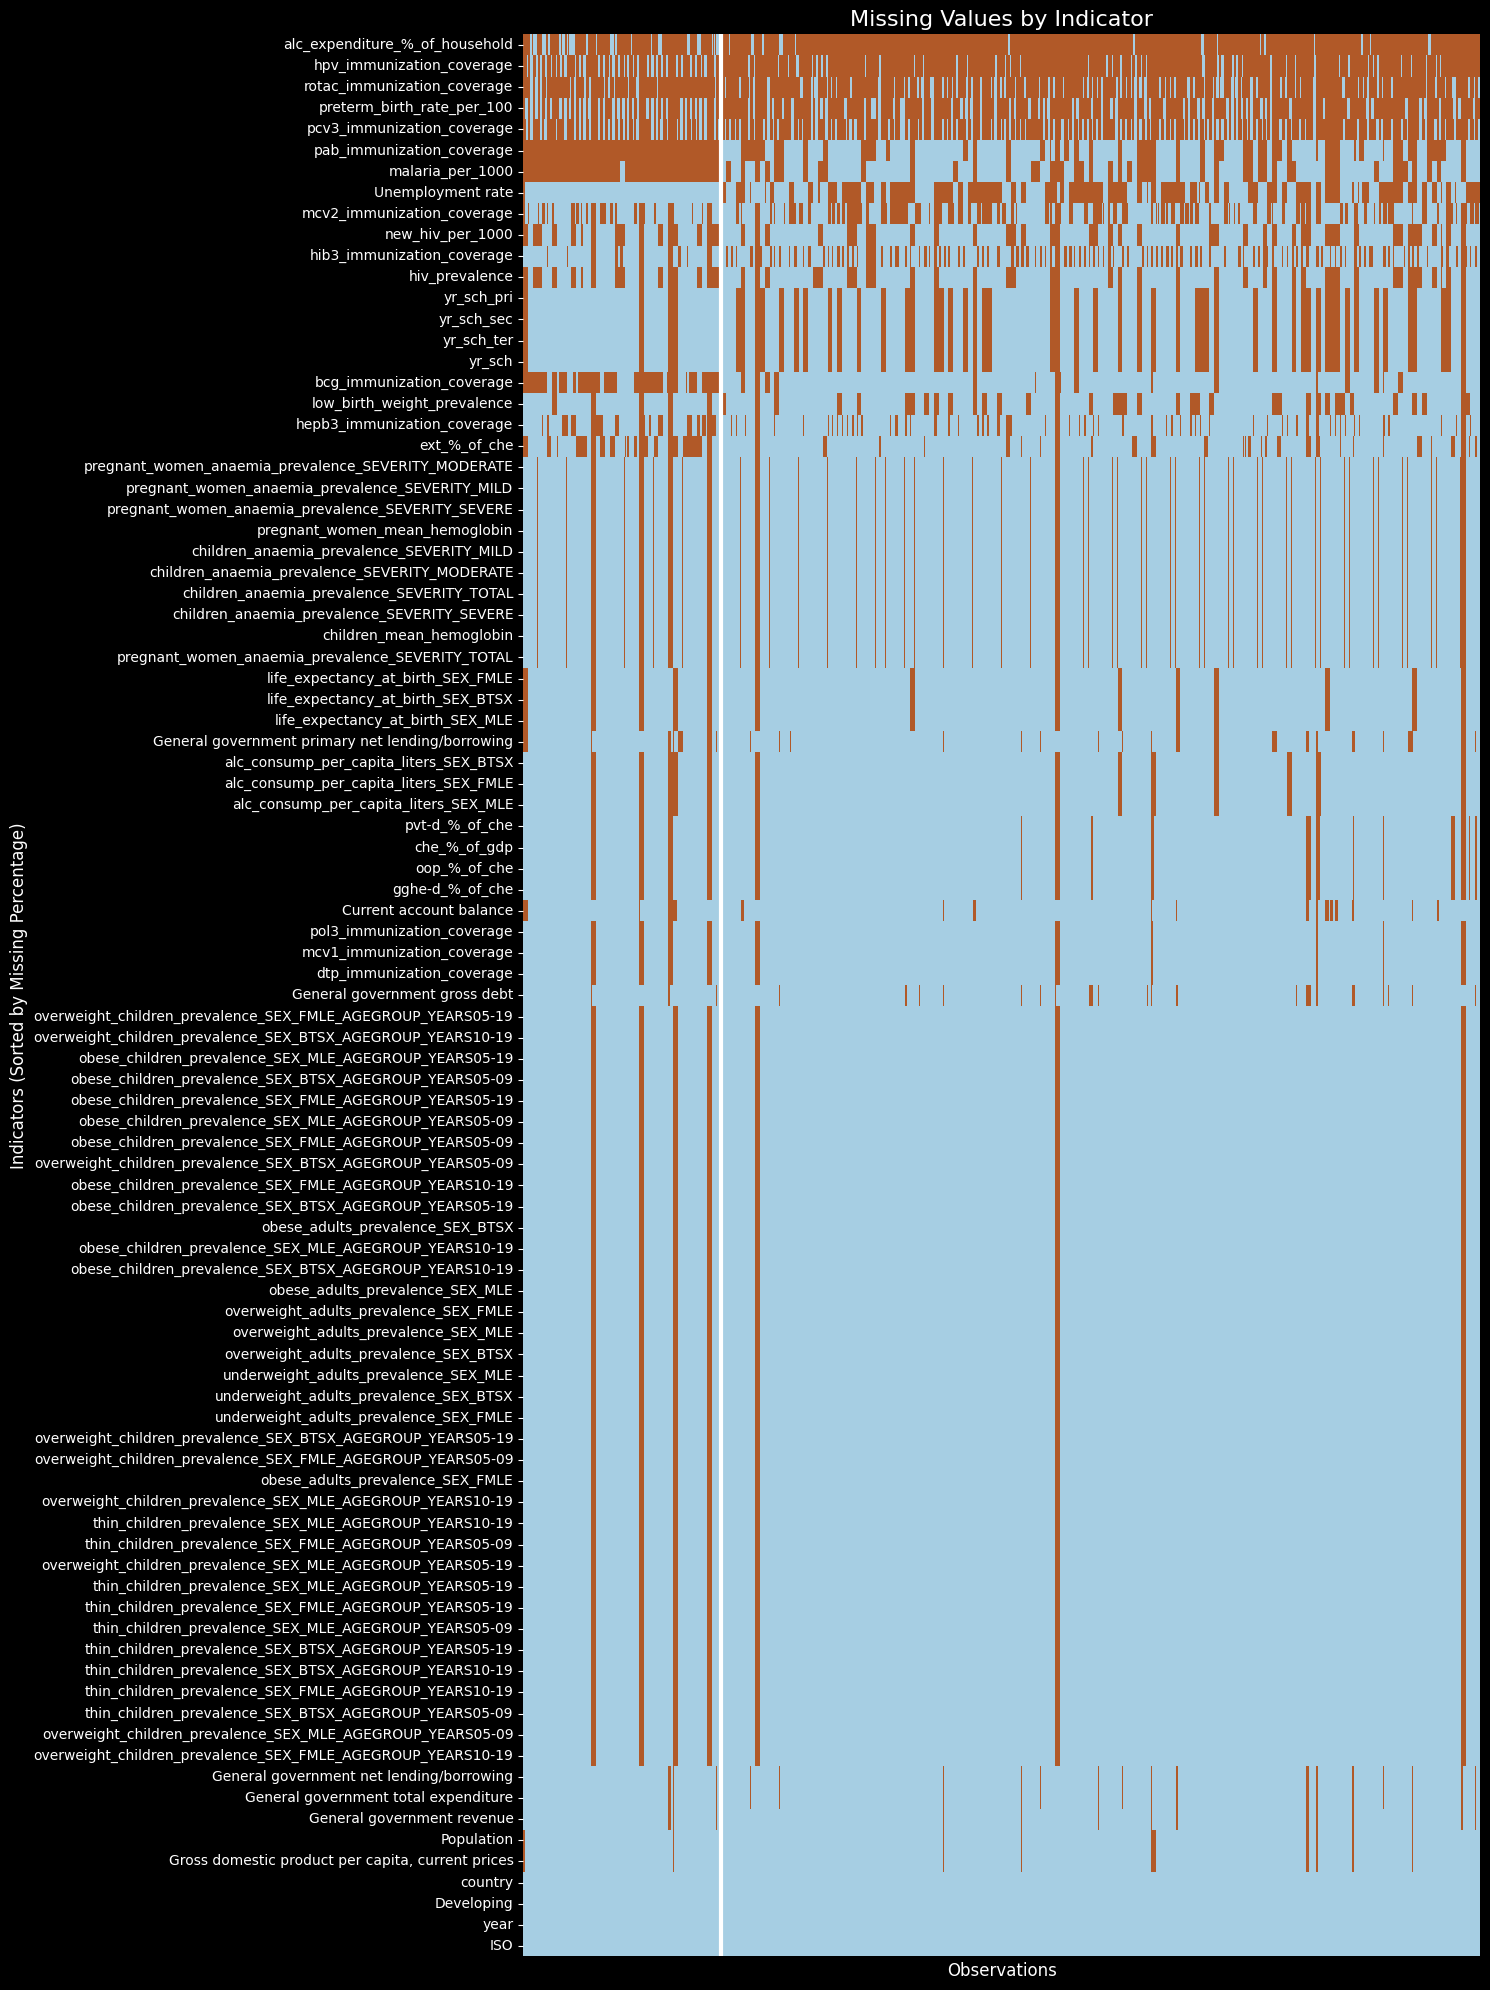

In [3]:
# Calculate the percentage of missing values for each column
missing_percent = (df.isnull().sum() / len(df)) * 100
sorted_columns = missing_percent.sort_values(ascending=False).index  # Sort columns by missing percentage

# Reorder the DataFrame columns based on missing percentage
df_sorted = df[sorted_columns]

# Heatmap with sorted yticks
plt.figure(figsize=(15, 20))
sns.heatmap(df_sorted.isnull().T, cbar=False, cmap='Paired')

plt.title('Missing Values by Indicator', fontsize=16)
plt.xlabel('Observations', fontsize=12)
plt.ylabel('Indicators (Sorted by Missing Percentage)', fontsize=12)

# Adjust ticks
plt.yticks(fontsize=10, rotation=0, va='center')  # Align yticks
plt.xticks([])
plt.tight_layout()  # Prevent clipping

# Add vertical line dividing developing and advanced economies
plt.axvline(df.shape[0] - sum(df["Developing"]), color='white', linewidth=3)

plt.show()

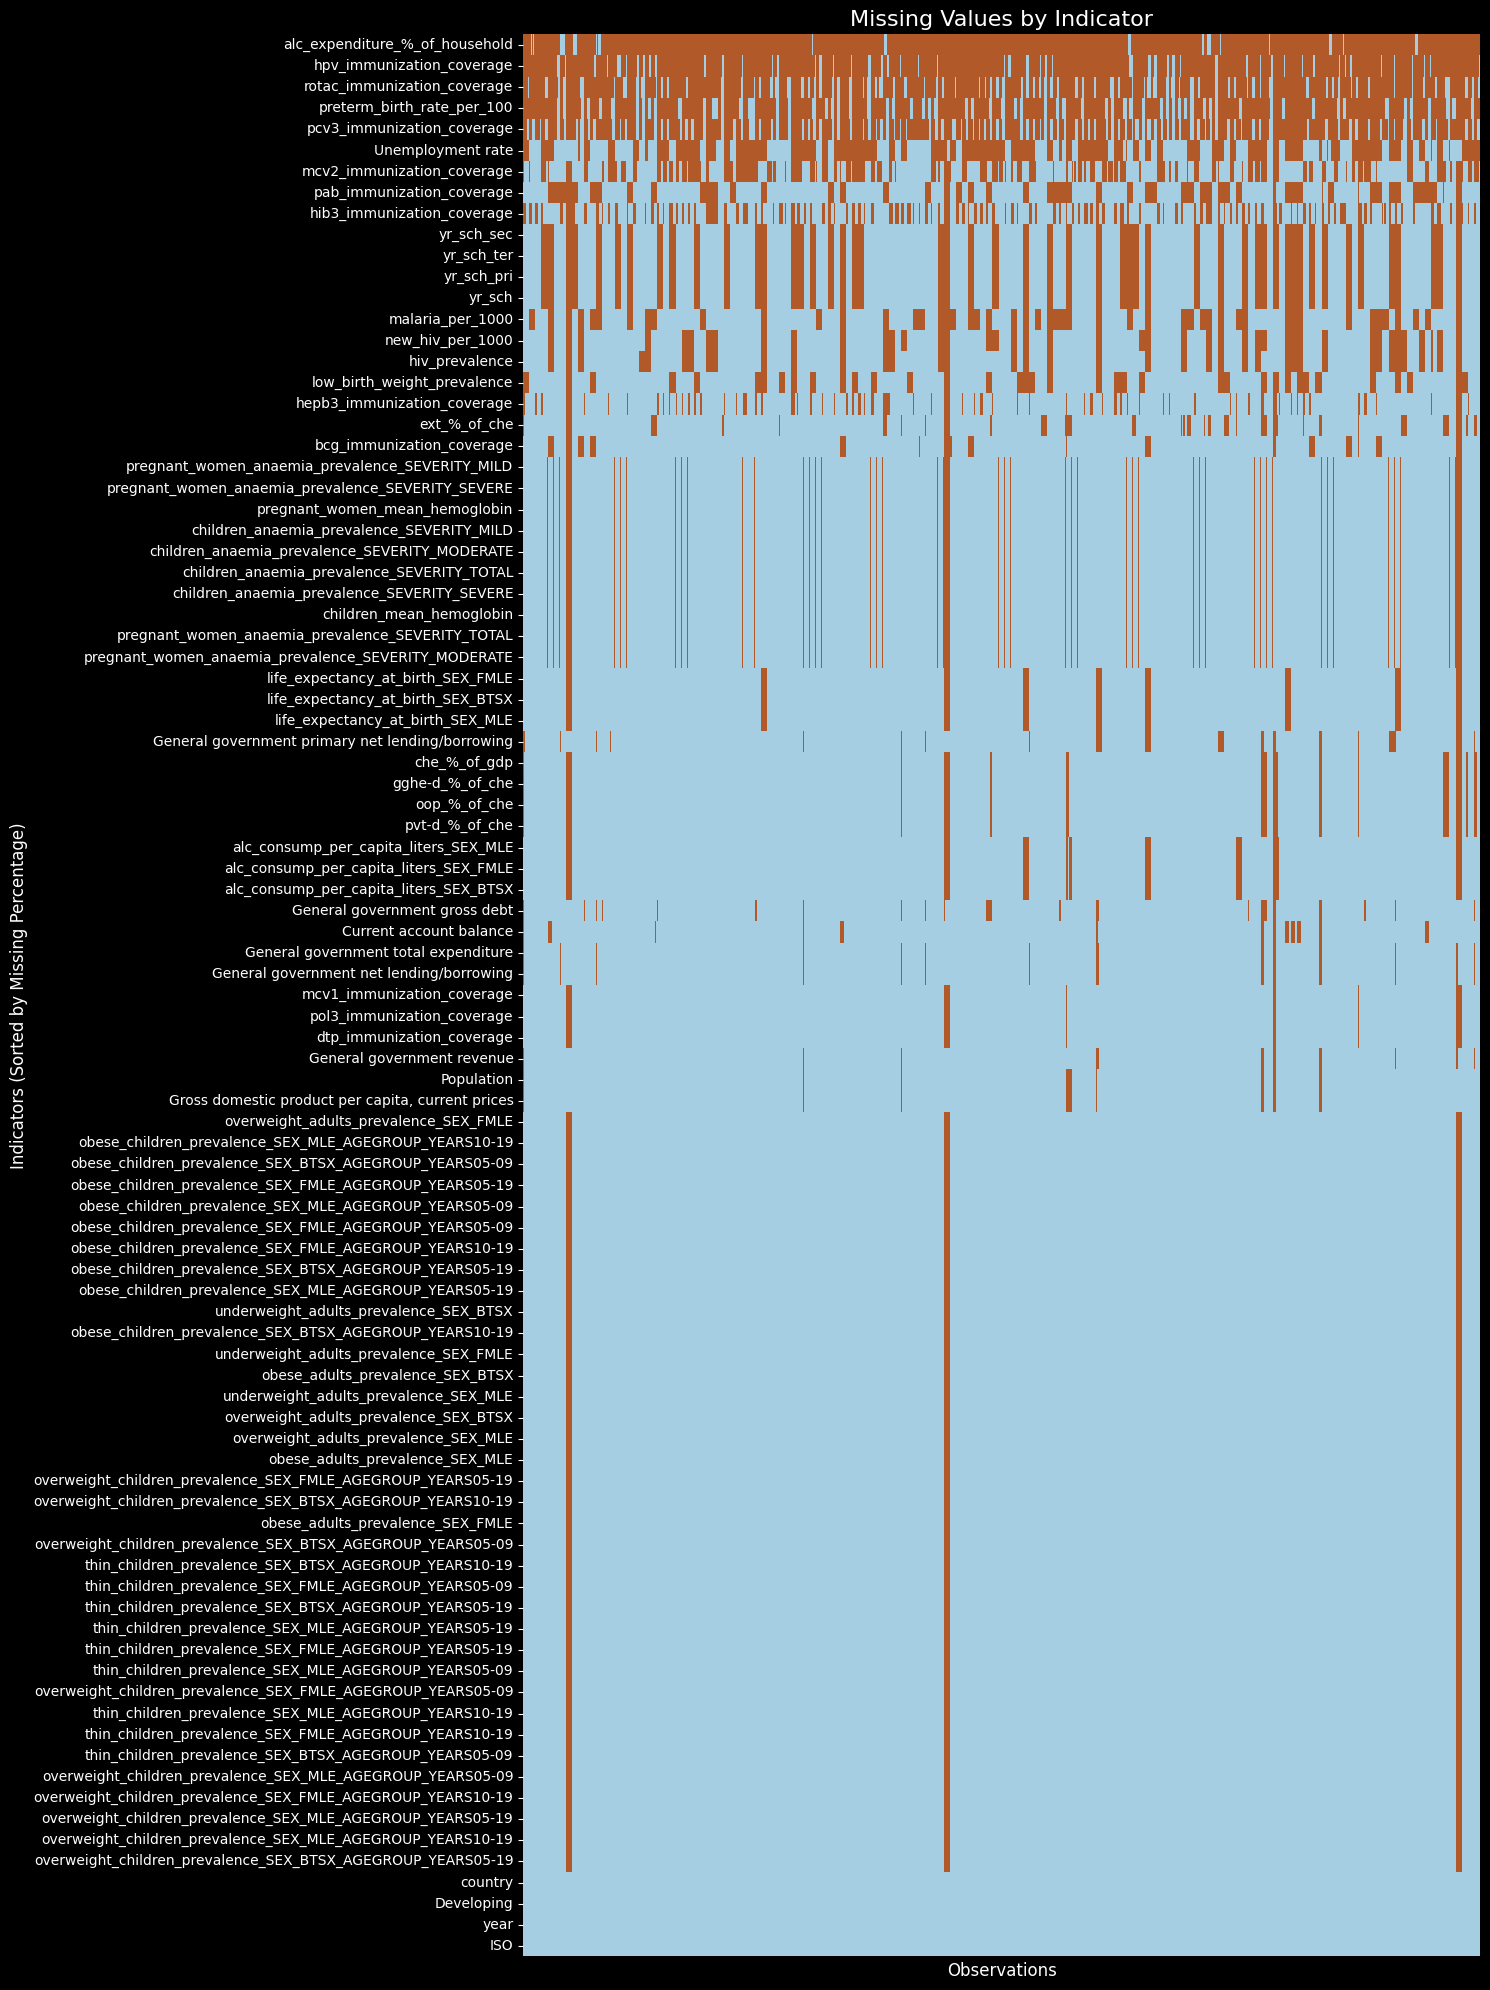

In [4]:
df_developing = df[df['Developing'] == 1]

# Calculate the percentage of missing values for each column
missing_percent = (df_developing.isnull().sum() / len(df_developing)) * 100
sorted_columns = missing_percent.sort_values(ascending=False).index  # Sort columns by missing percentage

# Reorder the DataFrame columns based on missing percentage
df_sorted = df_developing[sorted_columns]

# Heatmap with sorted yticks
plt.figure(figsize=(15, 20))
sns.heatmap(df_sorted.isnull().T, cbar=False, cmap='Paired')

plt.title('Missing Values by Indicator', fontsize=16)
plt.xlabel('Observations', fontsize=12)
plt.ylabel('Indicators (Sorted by Missing Percentage)', fontsize=12)

# Adjust ticks
plt.yticks(fontsize=10, rotation=0, va='center')  # Align yticks
plt.xticks([])
plt.tight_layout()  # Prevent clipping
plt.show()

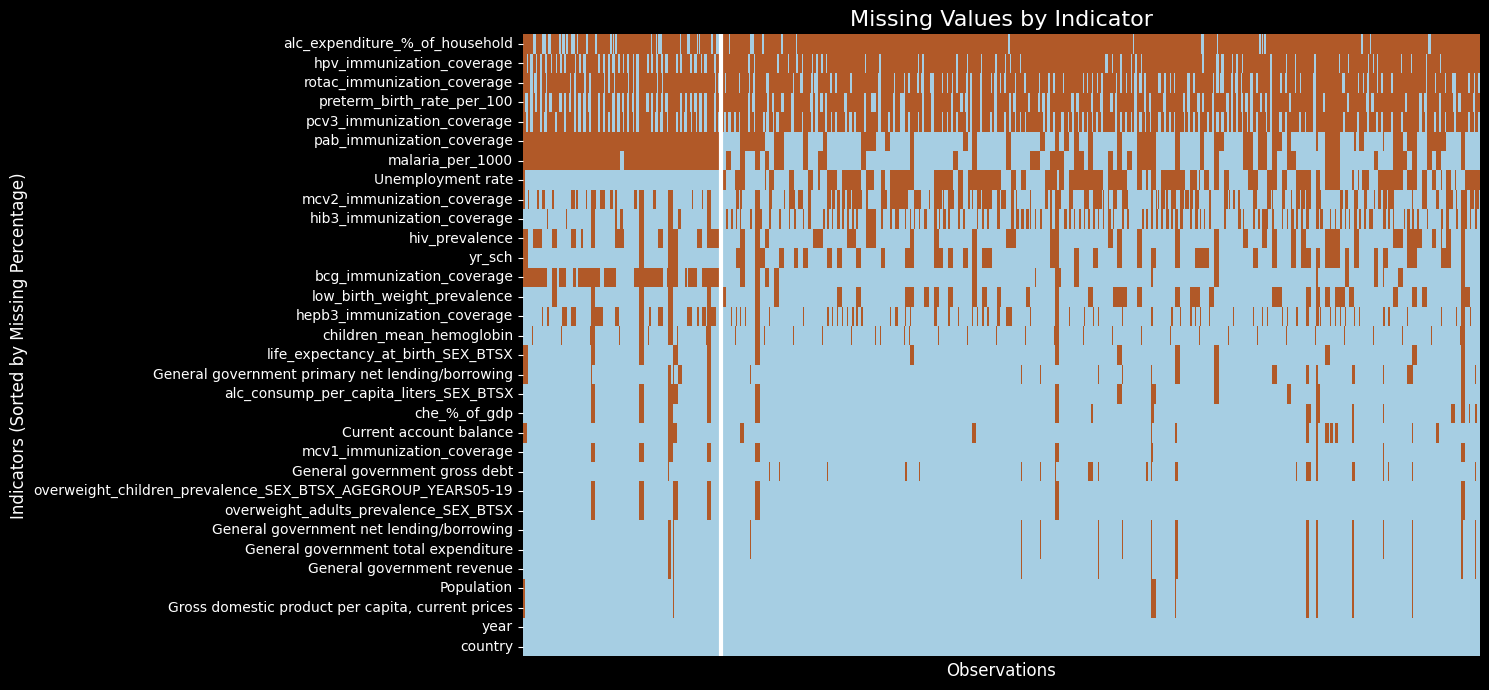

In [5]:
df_filtered = df[['country', 'year', 'yr_sch', 'Gross domestic product per capita, current prices',
                  'Unemployment rate', 'Population', 'General government revenue',
                  'General government total expenditure',
                  'General government net lending/borrowing',
                  'General government primary net lending/borrowing',
                  'General government gross debt', 'Current account balance',
                  'life_expectancy_at_birth_SEX_BTSX',
                  'bcg_immunization_coverage', 'hepb3_immunization_coverage', 'hib3_immunization_coverage', 
                  'hpv_immunization_coverage', 'mcv1_immunization_coverage', 'mcv2_immunization_coverage',
                  'pab_immunization_coverage', 'pcv3_immunization_coverage', 'rotac_immunization_coverage', 
                  'hiv_prevalence', 'malaria_per_1000',
                  'che_%_of_gdp', 
                  'alc_consump_per_capita_liters_SEX_BTSX',
                  'alc_expenditure_%_of_household', 
                  'preterm_birth_rate_per_100', 'low_birth_weight_prevalence', 
                  'children_mean_hemoglobin',
                  'overweight_children_prevalence_SEX_BTSX_AGEGROUP_YEARS05-19',
                  'overweight_adults_prevalence_SEX_BTSX']]

# Calculate the percentage of missing values for each column
missing_percent = (df_filtered.isnull().sum() / len(df_filtered)) * 100
sorted_columns = missing_percent.sort_values(ascending=False).index  # Sort columns by missing percentage

# Reorder the DataFrame columns based on missing percentage
df_sorted = df_filtered[sorted_columns]

# Heatmap with sorted yticks
plt.figure(figsize=(15, 7))
sns.heatmap(df_sorted.isnull().T, cbar=False, cmap='Paired')

plt.title('Missing Values by Indicator', fontsize=16)
plt.xlabel('Observations', fontsize=12)
plt.ylabel('Indicators (Sorted by Missing Percentage)', fontsize=12)

# Adjust ticks
plt.yticks(fontsize=10, rotation=0, va='center')  # Align yticks
plt.xticks([])
plt.tight_layout()  # Prevent clipping

# Add vertical line dividing developing and advanced economies
plt.axvline(df.shape[0] - sum(df["Developing"]), color='white', linewidth=3)

plt.show()

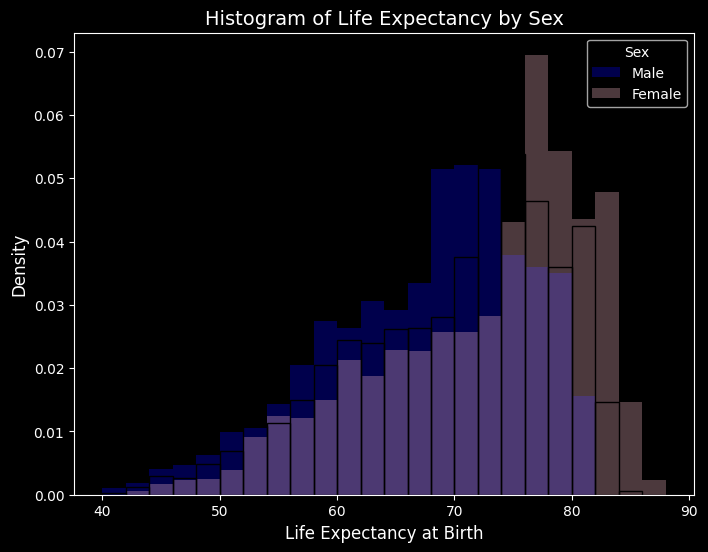

In [6]:
# Create the plot
plt.figure(figsize=(8, 6))

# Define the bin width to ensure all histograms have the same bins
bin_width = 2  # Adjust as necessary based on the range of life expectancy
bins = range(int(df['life_expectancy_at_birth_SEX_MLE'].min()), int(df['life_expectancy_at_birth_SEX_FMLE'].max()) + bin_width, bin_width)

# Plot for males (blue with low opacity)
sns.histplot(df['life_expectancy_at_birth_SEX_MLE'], 
             color='blue', label='Male', bins=bins,
             stat='density', 
             alpha=0.3, edgecolor=None)

# Plot for females (pink with low opacity)
sns.histplot(df['life_expectancy_at_birth_SEX_FMLE'], 
             color='pink', label='Female', bins=bins,
             stat='density', 
             alpha=0.3, edgecolor=None)

# Plot for both sexes combined (white with black outline)
sns.histplot(df['life_expectancy_at_birth_SEX_BTSX'], 
             stat='density', 
             bins=bins, alpha=0, edgecolor='black', linewidth=1)

# Customize the labels and title
plt.xlabel('Life Expectancy at Birth', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.title('Histogram of Life Expectancy by Sex', fontsize=14)
plt.legend(title='Sex', loc='upper right')

# Display the plot
plt.show()


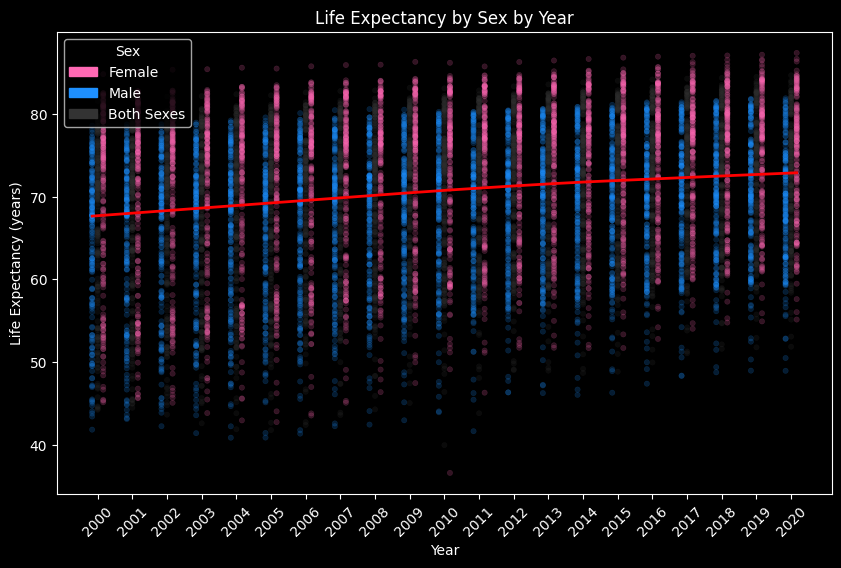

In [7]:
import matplotlib.patches as mpatches

# Create a new DataFrame for plotting, stacking the three life expectancy columns
plot_df = df[['year', 'life_expectancy_at_birth_SEX_FMLE', 'life_expectancy_at_birth_SEX_MLE', 'life_expectancy_at_birth_SEX_BTSX']].melt(
    id_vars=['year'],
    value_vars=['life_expectancy_at_birth_SEX_FMLE', 'life_expectancy_at_birth_SEX_MLE', 'life_expectancy_at_birth_SEX_BTSX'],
    var_name='sex',
    value_name='life_expectancy'
)

# Adjust the 'year' to spread out male and female data points
plot_df['year_adjusted'] = plot_df.apply(
    lambda row: row['year'] - 0.16 if row['sex'] == 'life_expectancy_at_birth_SEX_MLE' else (row['year'] + 0.16 if row['sex'] == 'life_expectancy_at_birth_SEX_FMLE' else row['year']),
    axis=1
)

# Map the sex to the respective colors
color_map = {
    'life_expectancy_at_birth_SEX_FMLE': 'hotpink',
    'life_expectancy_at_birth_SEX_MLE': 'dodgerblue',
    'life_expectancy_at_birth_SEX_BTSX': (0.2,0.2,0.2)
}

# Plot the scatterplot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=plot_df, x='year_adjusted', y='life_expectancy', hue='sex', palette=color_map, alpha=0.2, edgecolor=None, s=15)

# Add a smooth line (nonlinear regression) tracking the mean life expectancy by year
sns.regplot(data=plot_df, x='year_adjusted', y='life_expectancy', scatter=False, lowess=True, color='red', line_kws={'alpha': 1, 'lw': 2})

# Customize the x-axis to show integer years between 2000 and 2020
plt.xticks(ticks=range(2000, 2021), labels=range(2000, 2021), rotation=45)

# Adjust plot aesthetics
plt.title('Life Expectancy by Sex by Year')
plt.xlabel('Year')
plt.ylabel('Life Expectancy (years)')

# Manually define legend colors and labels
handles = [
    mpatches.Patch(color='hotpink', label='Female', alpha=1),
    mpatches.Patch(color='dodgerblue', label='Male', alpha=1),
    mpatches.Patch(color=(0.2,0.2,0.2), label='Both Sexes', alpha=1)
]
plt.legend(handles=handles, title='Sex', loc='upper left')

# Show the plot
plt.show()


In [8]:
numeric_df = df.select_dtypes(include=['number'])

# Calculating correlations
correlations = numeric_df.corr()['life_expectancy_at_birth_SEX_BTSX']
correlations = correlations.reindex(correlations.abs().sort_values(ascending=False).index)

# Display the correlations
correlations.head(20)


life_expectancy_at_birth_SEX_BTSX                              1.000000
life_expectancy_at_birth_SEX_FMLE                              0.991829
life_expectancy_at_birth_SEX_MLE                               0.990795
children_anaemia_prevalence_SEVERITY_TOTAL                    -0.844863
children_mean_hemoglobin                                       0.832588
children_anaemia_prevalence_SEVERITY_MODERATE                 -0.827486
pregnant_women_anaemia_prevalence_SEVERITY_TOTAL              -0.771450
pregnant_women_anaemia_prevalence_SEVERITY_MODERATE           -0.771332
overweight_adults_prevalence_SEX_MLE                           0.763082
children_anaemia_prevalence_SEVERITY_MILD                     -0.729411
pregnant_women_mean_hemoglobin                                 0.724675
pregnant_women_anaemia_prevalence_SEVERITY_MILD               -0.722264
yr_sch                                                         0.719150
overweight_children_prevalence_SEX_MLE_AGEGROUP_YEARS05-19     0

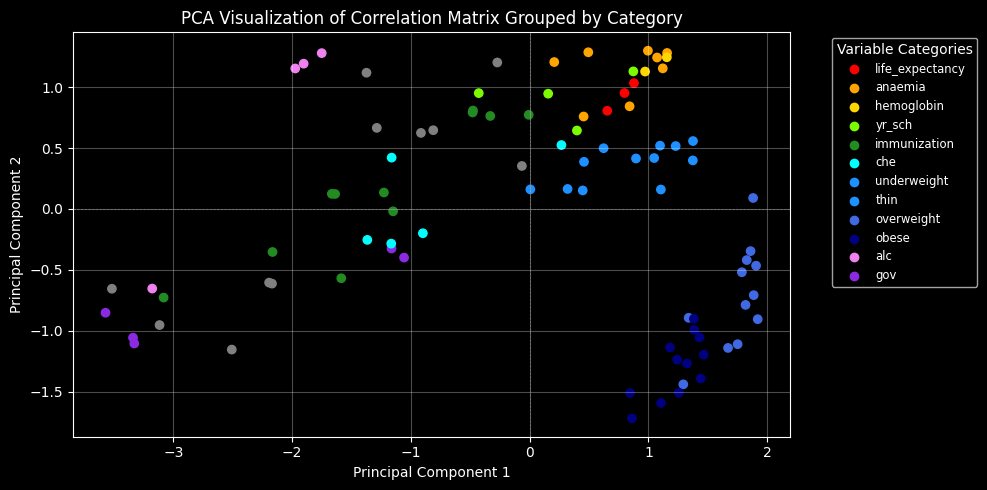

In [9]:
numeric_df = df.select_dtypes(include=['number'])

# Step 1: Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_df)

# Step 2: Handle missing values using KNN imputation
imputer = KNNImputer(n_neighbors=5)
imputed_data = imputer.fit_transform(scaled_data)

# Step 3: Compute the correlation matrix
correlation_matrix = np.abs(np.corrcoef(imputed_data, rowvar=False))

# Step 4: Perform PCA on the correlation matrix
pca = PCA()
pca.fit(correlation_matrix)

# Step 6: Project the data onto the first two principal components
pca_result = pca.transform(correlation_matrix)
pca_df = pd.DataFrame(pca_result[:, :2], columns=['PC1', 'PC2'], index=numeric_df.columns)

# Define color mapping based on column name text
color_mapping = {
    'life_expectancy': 'red',
    'anaemia': 'orange',
    'hemoglobin': 'gold',
    'yr_sch': 'lawngreen',
    'immunization': 'forestgreen',
    'che': 'aqua',
    'underweight': 'dodgerblue',
    'thin': 'dodgerblue',
    'overweight': 'royalblue',
    'obese': 'navy',
    'alc': 'violet',
    'gov': 'blueviolet'
}

# Assign colors to each column based on the mapping
def assign_color(column_name):
    for key, color in color_mapping.items():
        if key in column_name:
            return color
    return 'gray'  # Default color for columns not matching any criteria

colors = [assign_color(col) for col in numeric_df.columns]

# Visualize the PCA results without marker labels
plt.figure(figsize=(10, 5))
plt.scatter(pca_df['PC1'], pca_df['PC2'], c=colors)

# Add legend
for label, color in color_mapping.items():
    plt.scatter([], [], c=color, label=label)
plt.legend(title="Variable Categories", loc='best', bbox_to_anchor=(1.05, 1), fontsize='small')

# Plot aesthetics
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Visualization of Correlation Matrix Grouped by Category')
plt.axhline(0, color='gray', linestyle='--', linewidth=0.5)
plt.axvline(0, color='gray', linestyle='--', linewidth=0.5)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


/var/folders/97/23ltc4v96g31pp78_gyv6dvm0000gn/T/ipykernel_42871/2095424739.py:31: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(pca_df['PC1'][i], pca_df['PC2'][i], label, fontsize=9)


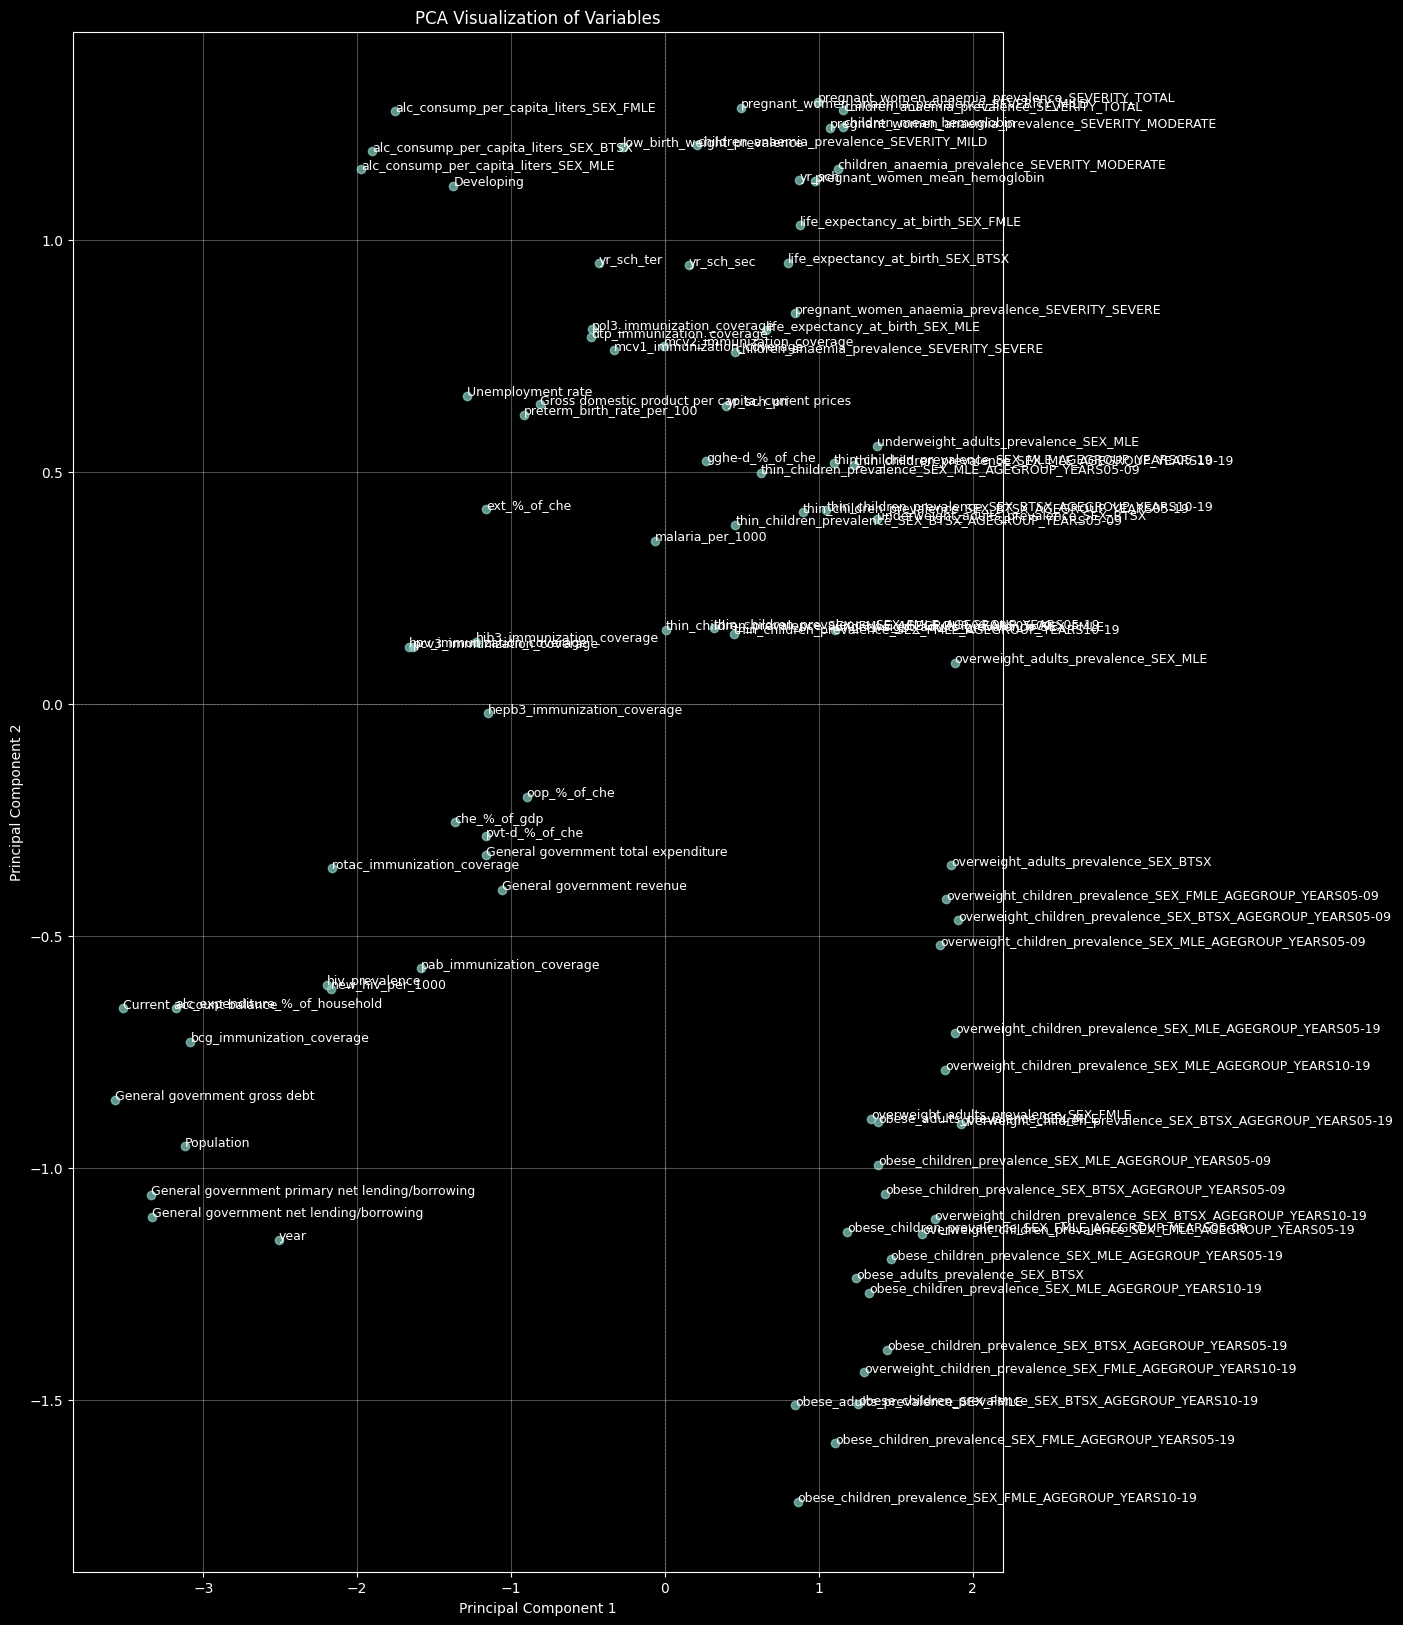

In [10]:
from sklearn.impute import KNNImputer
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_df)

# Step 2: Handle missing values using KNN imputation
imputer = KNNImputer(n_neighbors=5)
imputed_data = imputer.fit_transform(scaled_data)

# Step 3: Compute the correlation matrix
correlation_matrix = np.abs(np.corrcoef(imputed_data, rowvar=False))

# Step 4: Perform PCA on the correlation matrix
pca = PCA()
pca.fit(correlation_matrix)

# Step 6: Project the data onto the first two principal components
pca_result = pca.transform(correlation_matrix)
pca_df = pd.DataFrame(pca_result[:, :2], columns=['PC1', 'PC2'], index=numeric_df.columns)

# Step 7: Visualize the PCA results
plt.figure(figsize=(12, 20))
plt.scatter(pca_df['PC1'], pca_df['PC2'], alpha=0.7)
for i, label in enumerate(pca_df.index):
    plt.text(pca_df['PC1'][i], pca_df['PC2'][i], label, fontsize=9)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Visualization of Variables')
plt.axhline(0, color='gray', linestyle='--', linewidth=0.5)
plt.axvline(0, color='gray', linestyle='--', linewidth=0.5)
plt.grid(alpha=0.3)
plt.show()


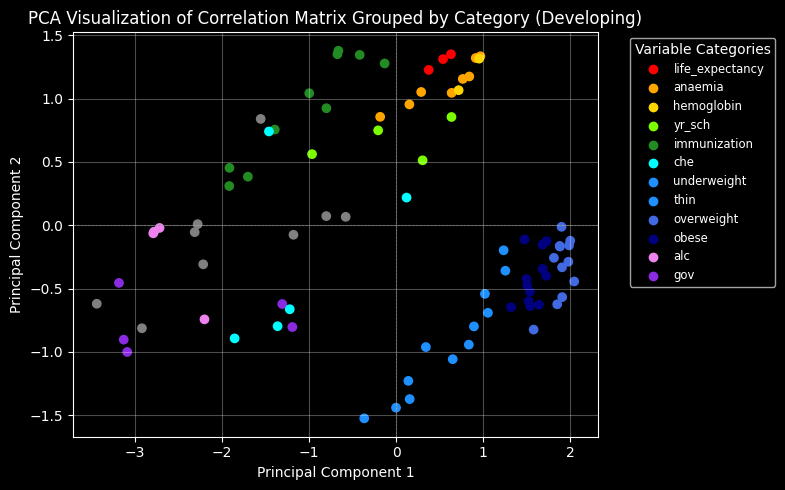

In [11]:
numeric_df = df.select_dtypes(include=['number'])
numeric_df = numeric_df[numeric_df["Developing"] == 1]
numeric_df = numeric_df.drop(["Developing", "pab_immunization_coverage", "malaria_per_1000"], axis=1)

# Step 1: Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_df)

# Step 2: Handle missing values using KNN imputation
imputer = KNNImputer(n_neighbors=5)
imputed_data = imputer.fit_transform(scaled_data)

# Step 3: Compute the correlation matrix
correlation_matrix = np.abs(np.corrcoef(imputed_data, rowvar=False))

# Step 4: Perform PCA on the correlation matrix
pca = PCA()
pca.fit(correlation_matrix)

# Step 6: Project the data onto the first two principal components
pca_result = pca.transform(correlation_matrix)
pca_df = pd.DataFrame(pca_result[:, :2], columns=['PC1', 'PC2'], index=numeric_df.columns)

# Define color mapping based on column name text
color_mapping = {
    'life_expectancy': 'red',
    'anaemia': 'orange',
    'hemoglobin': 'gold',
    'yr_sch': 'lawngreen',
    'immunization': 'forestgreen',
    'che': 'aqua',
    'underweight': 'dodgerblue',
    'thin': 'dodgerblue',
    'overweight': 'royalblue',
    'obese': 'navy',
    'alc': 'violet',
    'gov': 'blueviolet'
}

# Assign colors to each column based on the mapping
def assign_color(column_name):
    for key, color in color_mapping.items():
        if key in column_name:
            return color
    return 'gray'  # Default color for columns not matching any criteria

colors = [assign_color(col) for col in numeric_df.columns]

# Visualize the PCA results without marker labels
plt.figure(figsize=(8, 5))
plt.scatter(pca_df['PC1'], pca_df['PC2'], c=colors)

# Add legend
for label, color in color_mapping.items():
    plt.scatter([], [], c=color, label=label)
plt.legend(title="Variable Categories", loc='best', bbox_to_anchor=(1.05, 1), fontsize='small')

# Plot aesthetics
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Visualization of Correlation Matrix Grouped by Category (Developing)')
plt.axhline(0, color='gray', linestyle='--', linewidth=0.5)
plt.axvline(0, color='gray', linestyle='--', linewidth=0.5)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()